# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("api.env")


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
montly_income = 12000

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [5]:
# Fetch current BTC price

#https://www.w3schools.com/python/python_dictionaries_access.asp 
#https://bootcampspot.instructure.com/courses/4769/external_tools/313 
#https://www.geeksforgeeks.org/response-json-python-requests/ 

#I have to get the price by calling the API: 
response_btc = requests.get(btc_url)
data_btc = response_btc.json()
#because the values are stored in a dictionary, I call in the key-value pairs
my_btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
#see above. 
response_eth = requests.get(eth_url)
data_eth = response_eth.json()
my_eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
#They have 1.2 BTC and 5.3 ETH. I simply multiply 
my_btc = 1.2*my_btc_value
my_eth = 5.3*my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 48168.0 BTC is $40140.00
The current value of your 11835.112 ETH is $2233.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
apikey = os.getenv("ALPACA_API_KEY")
secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

 
alpaca = tradeapi.REST(
    apikey, secret,
    api_version = "v2")
                    

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-19",tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
    ).df

portfolio

# Reorganize the DataFrame
# Separate ticker data
agg = portfolio[portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1) 
spy = portfolio[portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
portfolio = pd.concat([agg,spy], axis = 1, keys = ['SPY','AGG'])

# Preview DataFrame
portfolio 




SPY                                              \
                           close   high      low trade_count   open   volume   
timestamp                                                                      
2024-01-19 05:00:00+00:00  98.02  98.02  97.6714       32022  97.89  9126093   

                                        AGG                                \
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-19 05:00:00+00:00  97.90435  482.43  482.72  476.5374      608468   

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-01-19 05:00:00+00:00  477.65  110834483  479.966713

In [9]:
# Pick AGG and SPY close prices
spy_close_price = portfolio["SPY"]["close"][0]
agg_close_price = portfolio["AGG"]["close"][0]



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $482.43
Current SPY closing price: $98.02


/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/160282093.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_close_price = portfolio["SPY"]["close"][0]
/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/160282093.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  agg_close_price = portfolio["AGG"]["close"][0]


In [10]:
# Compute the current value of shares
#Each member holds 110 shares of SPDR500 and 200 of AGG 
my_spy = 110
my_agg = 200 

#current value calculated here: 

my_spy_value = 110 * spy_close_price
my_agg_value = 200 * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 110 SPY shares is $10782.20
The current value of your 200 AGG shares is $96486.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# savings_stocks = my_spy_value + my_agg_value 
# savings_crypto = my_btc_value + my_eth_value

savings = [my_spy_value + my_agg_value, my_btc_value + my_eth_value] 
#Shah



# savings["Stocks"]=savings_stocks
# savings["Crypto"]=savings_crypto

# Create savings DataFrame
df_savings = pd.DataFrame(savings, columns = ["Amount"], index = ["Stocks","Crypto"])

# Display savings DataFrame
display(df_savings)

,Amount
Stocks,107268.20
Crypto,42373.04


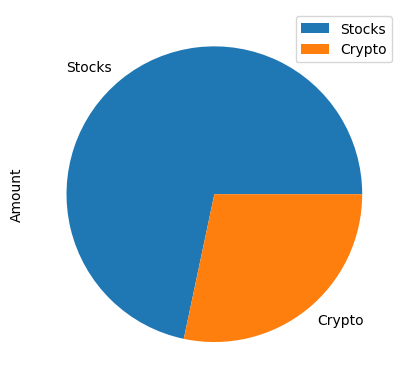

In [12]:
# Plot savings pie chart
plot = df_savings.plot.pie(y = 'Amount')

#using the exact name of the column. 

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings #thank you Aditya
totalsavings = df_savings["Amount"].sum()

diff = totalsavings - emergency_fund

print(totalsavings)

if totalsavings > emergency_fund:
    print("Congratulations for having enough money in the fund")
elif totalsavings == emergency_fund: 
    print("You reached the exact amount!")
else: 
    print(f"you are {diff} away from reaching your financial goals")


149641.24
Congratulations for having enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

## 

In [15]:
# Get 5 years worth of historical data for SPY and AGG 
timeframe = "1Day"


portfolio_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 10000
    ).df

# Reorganize the DataFrame
# Separate ticker data
SPY500 = portfolio_5_year[portfolio_5_year["symbol"]=="SPY"].drop("symbol",axis = 1)
AGGBOND = portfolio_5_year[portfolio_5_year["symbol"]=="AGG"].drop("symbol",axis = 1)


# Concate the ticker DataFrames
portfolio_5_year = pd.concat([SPY500,AGGBOND], axis = 1, keys = ["SPY","AGG"])

# Display Sample Data
portfolio_5_year.head()


SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631

In [16]:
#Organizing the data to get only the close prices 


# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = portfolio_5_year,
    weights = [0.60,0.40],
    num_simulation= 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 110.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 120.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 130.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 140.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 150.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 160.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 170.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 180.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 190.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 200.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 210.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 220.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 230.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 240.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 250.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 260.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 270.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 280.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 290.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 300.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 310.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 320.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 330.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 340.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 350.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 360.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 370.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 380.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 390.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 400.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 410.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 420.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 430.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 440.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 450.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 460.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 470.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 480.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

Running Monte Carlo simulation number 490.


/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/ravic./UCB_FinTech/module_5/Instructions/Starter_Code/MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995897,1.006266,1.002301,0.996932,0.989724,1.001793,1.008309,1.007904,0.993891,1.005878,...,1.001087,0.991533,0.998058,1.015097,0.998313,1.015427,0.995801,1.009535,1.007836,0.989924
2,1.007953,1.004534,1.000590,1.005772,1.009773,0.999005,1.003249,1.004695,0.999053,1.002420,...,1.013652,0.999720,1.013883,0.998132,0.999852,0.997662,0.995070,1.012449,1.017816,0.964983
3,1.008331,1.004555,0.992466,1.014029,1.004928,0.983435,1.000080,1.002567,0.993236,0.989629,...,1.010739,1.004511,1.020782,0.992633,0.996548,0.991295,1.001220,1.011002,1.018218,0.957276
4,1.014245,1.009314,0.998480,1.013037,1.006016,0.969162,0.995460,0.987236,0.994479,0.998175,...,1.015333,1.008923,1.012131,0.988325,1.002969,0.990130,0.997185,1.017346,1.024885,0.952443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.463486,35.440598,18.848118,23.585639,20.187143,20.016511,5.516300,18.547551,8.133385,17.764034,...,8.643352,8.709231,7.759691,38.306484,13.835381,13.557977,20.576005,68.846448,11.508920,29.005251
7557,5.485398,34.959747,18.676528,23.439531,19.973669,19.936232,5.470665,18.450700,8.195186,17.693022,...,8.584519,8.722508,7.716048,38.600737,13.938183,13.509513,20.770192,68.465222,11.662417,28.820147
7558,5.408338,34.846841,18.642088,23.365979,20.013380,19.816095,5.484045,18.596258,8.100535,17.746624,...,8.504735,8.680311,7.770868,37.668625,13.917710,13.553146,20.658829,69.094361,11.713711,28.957987
7559,5.425257,34.867429,18.535691,23.275215,20.006812,19.786013,5.501922,18.466540,8.078560,17.633575,...,8.520574,8.642763,7.752362,37.674186,13.905213,13.767204,20.769955,69.711462,11.866774,29.089605


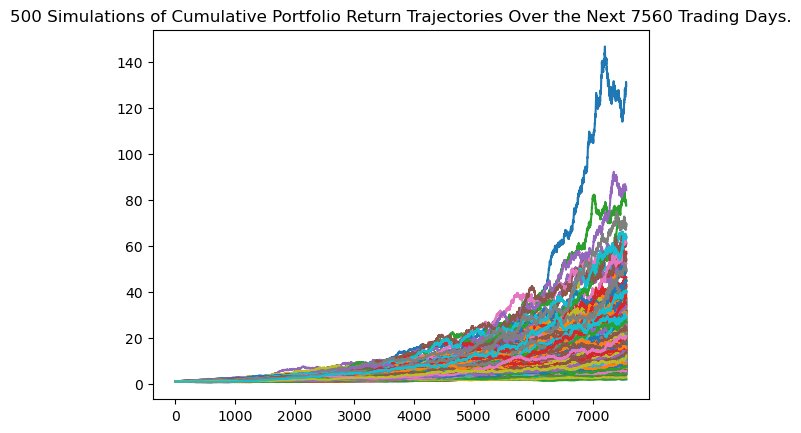

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

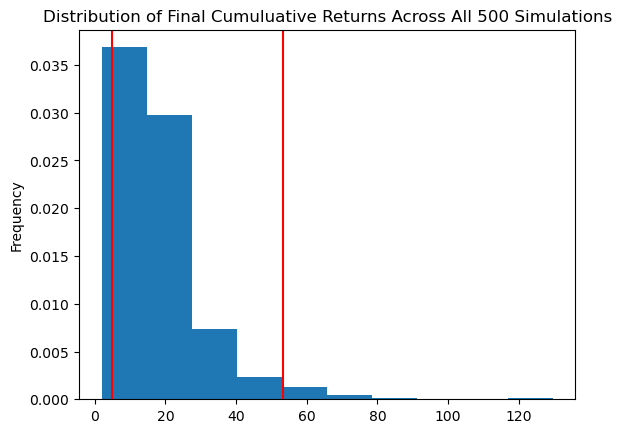

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl =  MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             18.394550
std              12.826245
min               1.985000
25%              10.388911
50%              15.170552
75%              22.746232
max             129.540540
95% CI Lower      4.926969
95% CI Upper     53.148144
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98539.38 and $1062962.87


/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/2556603503.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(even_tbl[8]*initial_investment,2)
/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/2556603503.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(even_tbl[9]*initial_investment,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $147809.08 and $1594444.31


/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/2686960791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(even_tbl[8]*initial_investment,2)
/var/folders/jm/yl4jhp9j0z1b4xdws78jvgjc0000gn/T/ipykernel_19536/2686960791.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(even_tbl[9]*initial_investment,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")